<a href="https://colab.research.google.com/github/samyaahsan/deep_learning_CNN_for_ASL/blob/main/sign_language.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

uni ska2138

# MNIST Sign Language

In [ ]:
import keras

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics         import accuracy_score
from sklearn.model_selection import train_test_split

from keras.utils  import to_categorical
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [ ]:
class SignLanguage:
    def __init__(self):
        self.model = None
        
        self.data = {
            "train": None,
            "test" : None
        }
        self.create_model()
    
    def create_model(self):
        input_shape = [28,28,1]
        num_classes = 10

        """
        Create a CNN model and save it to self.model
        """
        
        # TODO: Create a Sequential model
        model = Sequential(
            [
              keras.Input(shape=input_shape),
              layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
              layers.MaxPooling2D(pool_size=(2, 2)),
              layers.Dropout(0.2),
              layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
              layers.MaxPooling2D(pool_size=(2, 2)),
              layers.Dropout(0.2),
              layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
              layers.MaxPooling2D(pool_size=(2, 2)),
              layers.Dropout(0.2),
              layers.Flatten(),
             
              #model.add(Dense(1, activation='softmax'))
              #layers.Dense(128, activation = "relu"),
              #layers.Dropout(0.5),
              layers.Dense(25, activation="softmax"),
            ]
        )
        # TODO: Compile the model with categorical_crossentropy
        model.compile('adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
        
        self.model = model
        print(model.summary())
        
    
    def prepare_data(self, images, labels):
        """
        Use this method to normalize the dataset and split it into train/test.
        Save your data in self.data["train"] and self.data["test"] as a tuple
        of (images, labels)
        
        :param images numpy array of size (num_examples, 28*28)
        :param labels numpy array of size (num_examples, )
        """
        # TODO : split into training and validation set
        # TODO : reshape each example into a 2D image (28, 28, 1)
        input_shape = [28,28,1]
        num_classes = 10
        
        #x_train, x_test, y_train, y_test = train_test_split(self.images, self.labels, test_size=0.2, random_state = 84)
        #labels = keras.utils.to_categorical(labels) #!changed here -- one hot encoding
        x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = 84)
        x_train, x_test = x_train/255, x_test/255 #is this how you normalize?
        print(type(x_train))
        x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
        x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

        #one hot encoding
        y_train = to_categorical(y_train, num_classes = 25)
        y_test = to_categorical(y_test, num_classes = 25)
        



        # train = pd.read_csv('/content/test.csv')
        # test = pd.read_csv('/content/train.csv')
        # y_train = train["label"]
        # y_test = test["label"]
        # del train["label"]
        # del test["label"]
        
        self.data = {
            "train": (x_train, y_train), # (x_train, y_train)
            "test" : (x_test, y_test) # (x_test, y_test)
        }
    
    
    def train(self, batch_size:int=128, epochs:int=50, verbose:int=1):
        """
        Use model.fit() to train your model. Make sure to return the history for a neat visualization.
        
        :param batch_size The batch size to use for training
        :param epochs     Number of epochs to use for training
        :param verbose    Whether or not to print training output
        """

        
        x_train = self.data["train"][0]
        print("x train shape:" , x_train.shape)
        y_train = self.data["train"][1]
        print("y train shape:" , y_train.shape)

        x_test = self.data["test"][0]
        print("x test shape:" , x_test.shape)
        y_test = self.data["test"][1]
        print("y test shape:" , y_test.shape)
      
        history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
        return history

        # history = model.fit(datagen.flow(x_train, y_train, batch_size = self.batch_size), epochs = self.epochs,
        #                     validation_data = (x_test, y_test), verbose = self.verbose)

    
    def predict(self, data):
        """
        Use the trained model to predict labels for test data.
        
        :param data: numpy array of test images
        :return a numpy array of test labels. array size = (num_examples, )
        """
        
        # Don't forget to normalize the data in the same way as training data
        # self.model.predict() and np.argmax( , axis=1) might help
        #print(data)

        # # x_test = self.data["test"][0]
        # # print("x test shape:" , x_test.shape)
        # # y_test = self.data["test"][1]
        # # print("y test shape:" , y_test.shape)

        # # x_test, y_test = x_test/255, y_test/255 #is this how you normalize?
        # # x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
        # # #y_test = y_test.reshape(y_test.shape[0], 28, 28, 1)

        # x_test = self.data["test"][0]
        # y_test = self.data["test"][1]

        # x_test = x_test / 255
        # y_test = y_test / 22

        # x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
        # y_test = y_test.reshape(y_test.shape[0], 28, 28, 1)
        # # print("before shaping: " , data.shape)
        # # data = data.reshape(data.shape[0], 28, 28, 1)
        # # print("after shaping: ", data.shape)

        # x_test = self.data["test"][0]
        # print("x test shape:" , x_test.shape)
        # y_test = self.data["test"][1]
        # print("y test shape:" , y_test.shape)


        data = data / 255
        data = data.reshape(data.shape[0], 28, 28, 1)
        predict_x = self.model.predict(data)
        x_classes = np.argmax(predict_x,axis=1)
        return x_classes
        #return np.zeros(data.shape[0])
    
    def visualize_data(self, data):
        """
        Visualizing the hand gestures
        
        :param data: numpy array of images
        """
        if data is None: return
        
        nrows, ncols = 5, 5
        fig, axs = plt.subplots(nrows, ncols, figsize=(10, 10), sharex=True, sharey=True)
        plt.subplots_adjust(wspace=0, hspace=0)

        for i in range(nrows):
            for j in range(ncols):
                axs[i][j].imshow(data[0][i*ncols+j].reshape(28, 28), cmap='gray')
        plt.show()

    def visualize_accuracy(self, history):
        """
        Plots out the accuracy measures given a keras history object
        
        :param history: return value from model.fit()
        """
        if history is None: return
        
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title("Accuracy")
        plt.xlabel('epoch')
        plt.ylabel('accuracy')
        plt.legend(['train','test'])
        plt.show()


# Grading Script

Do NOT modify this section

In [ ]:
if __name__=="__main__":
    train = pd.read_csv('train.csv')
    test  = pd.read_csv('test.csv')

    train_labels, test_labels = train['label'].values, test['label'].values #gets labels (0 corresponding to A, 1 corresponding to B, etc.)
    train.drop('label', axis=1, inplace=True)
    test.drop('label', axis=1, inplace=True)

    num_classes = test_labels.max() + 1
    train_images, test_images = train.values, test.values

    print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(27455, 784) (27455,) (7172, 784) (7172,)


In [ ]:
if __name__=="__main__":
    my_model = SignLanguage()
    my_model.prepare_data(train_images, train_labels)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 conv2d_37 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)        

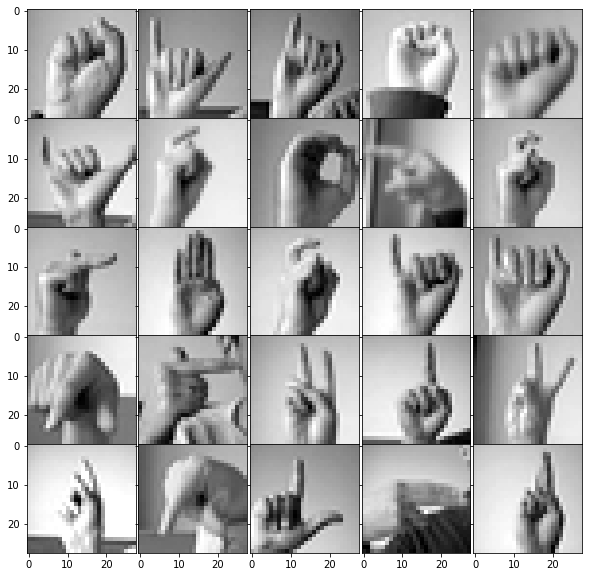

In [ ]:
if __name__=="__main__":
    my_model.visualize_data(my_model.data["train"])

x train shape: (21964, 28, 28, 1)
y train shape: (21964, 25)
x test shape: (5491, 28, 28, 1)
y test shape: (5491, 25)
Epoch 1/30
172/172 [==============================] - 2s 7ms/step - loss: 2.9111 - accuracy: 0.1222
Epoch 2/30
172/172 [==============================] - 1s 7ms/step - loss: 1.8135 - accuracy: 0.4236
Epoch 3/30
172/172 [==============================] - 1s 7ms/step - loss: 1.1925 - accuracy: 0.6124
Epoch 4/30
172/172 [==============================] - 1s 7ms/step - loss: 0.8842 - accuracy: 0.7058
Epoch 5/30
172/172 [==============================] - 1s 7ms/step - loss: 0.6972 - accuracy: 0.7640
Epoch 6/30
172/172 [==============================] - 1s 7ms/step - loss: 0.5753 - accuracy: 0.8042
Epoch 7/30
172/172 [==============================] - 1s 7ms/step - loss: 0.4704 - accuracy: 0.8396
Epoch 8/30
172/172 [==============================] - 1s 7ms/step - loss: 0.4028 - accuracy: 0.8635
Epoch 9/30
172/172 [==============================] - 1s 7ms/step - loss: 0.3513 -

KeyError: ignored

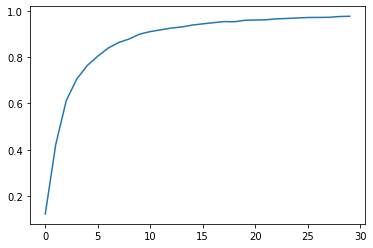

In [ ]:
if __name__=="__main__":
    history = my_model.train(epochs=30, verbose=1)
    my_model.visualize_accuracy(history)

In [ ]:
if __name__=="__main__":
    print("test images:" , test_images.shape)
    y_pred = my_model.predict(test_images)
    accuracy = accuracy_score(test_labels, y_pred)
    print(accuracy)

test images: (7172, 784)
225/225 [==============================] - 0s 2ms/step
0.9507808142777467
